In [2]:
using SolidStateDetectors
using Unitful
using Plots
using LegendHDF5IO
using Pkg
using LaTeXStrings
using Printf

-------------------

## convergence limit $10^{-7}$

In [3]:
conv_lim = [1e-7]
n_iterations_between_checks = 500



500

In [4]:
superdigits(n) = join(getindex.(
    ["⁰","¹","²","³","⁴","⁵","⁶","⁷","⁸","⁹"],
    digits(n) .+ 1
))

superdigits (generic function with 1 method)

In [5]:
c = [[5.51e-6, 5.23e-6, 4.97e-6, 1.68e-6,1.40e-6],
    [5.03e-6, 4.40e-6, 4.00e-6, 1.22e-6, 1.04e-6],
    [3.19e-6, 3.08e-6, 2.98e-6, 7.74e-7, 7.15e-7],
    [3.08e-6, 2.86e-6, 2.74e-6, 6.25e-7, 5.36e-7],
    [1.96e-6, 1.19e-6, 1.07e-6, 2.38e-7, 2.98e-7],
    [1.19e-6, 1.07e-6, 7.74e-7, 1.19e-7, 5.98e-8],
    [1.01e-6, 9.53e-7, 7.74e-7, 1.19e-7, 1.86e-9],
    [1.15e-6, 8.94e-7, 8.94e-7, 1.19e-7, 1.445e-11],
    [1.07e-6, 8.94e-7, 1.07e-6, 1.19e-7, 7.27e-12]]
n_iterations_between_checks = [500, 1000, 5000, 10000, 20000, 30000, 40000, 50000, 60000];
converged_iters = Set([30000, 40000, 50000, 60000])

refinement = [1, 0.2, 0.1, 0.05, 0.02]


5-element Vector{Float64}:
 1.0
 0.2
 0.1
 0.05
 0.02

In [6]:
@show length(refinement)
@show length.(c)


length(refinement) = 5
length.(c) = [5, 5, 5, 5, 5, 5, 5, 5, 5]


9-element Vector{Int64}:
 5
 5
 5
 5
 5
 5
 5
 5
 5

In [7]:
palette = :Dark2
default(fontfamily = "Computer Modern", linewidth = 2)

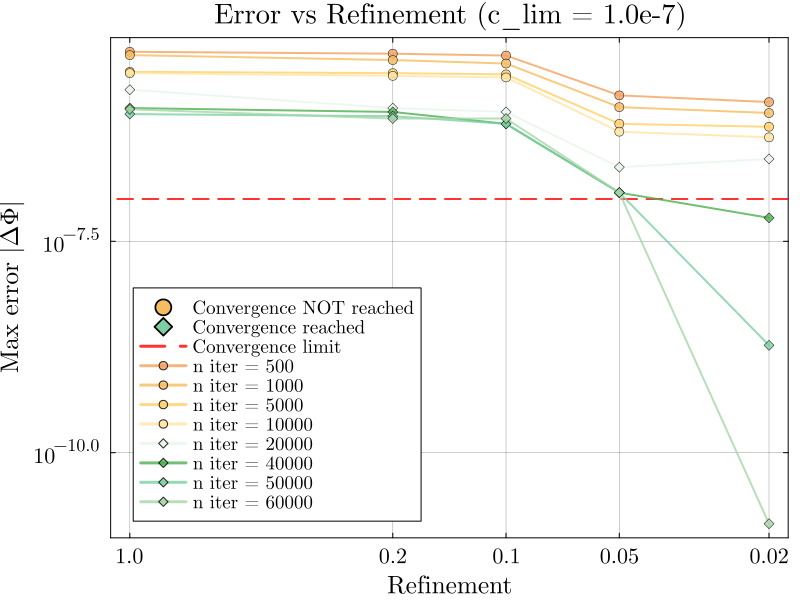

In [34]:
pastel_green = [
    "#4CAF50",
    "#7BCFA2",
    "#A5D6A7",
    "#C8E6C9",
    "#E8F5E9"
]

pastel_orange = [
    "#F4A261",
    "#F6BD60",
    "#FFD166",
    "#FFE5A5",
    "#FFF1C1"
]

conv_lim = 1e-7
p = plot(
    xlabel = "Refinement",
    ylabel = "Max error |ΔΦ|",
    title = "Error vs Refinement (c_lim = $conv_lim)",
    legend = :bottomleft,
    legendfontsize = 12,
    xscale = :log10,
    yscale = :log10,
    xticks = (refinement, refinement),
    xtickfontsize = 14,
    ytickfontsize = 14,
    guidefontsize = 16,
    titlefontsize = 18,
    grid = :on,
    gridalpha = 0.2,
    size = (800, 600),
    framestyle = :box,
    xflip = true
)

# --- legenda marker ---
scatter!(p, [NaN], [NaN],
    marker = :circle,
    color = pastel_orange[2],
    label = "Convergence NOT reached",
    markersize = 6
)

scatter!(p, [NaN], [NaN],
    marker = :diamond,
    color = pastel_green[2],
    label = "Convergence reached",
    markersize = 6
)

# --- linea limite ---
hline!(p, [1e-7],
    color = :red,
    lw = 2,
    alpha = 0.8,
    linestyle = :dash,
    label = "Convergence limit"
)

# --- curve ---
for i in 1:length(n_iterations_between_checks)

    iter = n_iterations_between_checks[i]
    converged = iter in converged_iters

    markerstyle = converged ? :diamond : :circle
    color = converged ?
        pastel_green[mod1(i, length(pastel_green))] :
        pastel_orange[mod1(i, length(pastel_orange))]

    plot!(
        p,
        refinement,
        c[i],
        label = "n iter = $(iter)",
        marker = markerstyle,
        markersize = 5,
        color = color,
        markerstrokecolor = :black,
        markerstrokewidth = 0.5,
        alpha = 0.8
    )
end

savefig(p, "error_vs_n_it_10-7_new.png")
display(p)


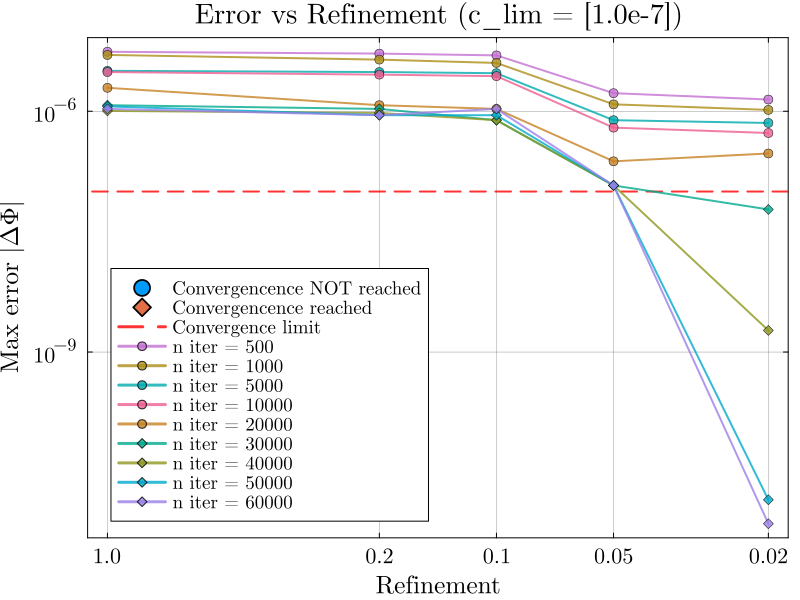

In [8]:
p = plot(
    xlabel = "Refinement",
    ylabel = "Max error |ΔΦ|",
    title = "Error vs Refinement (c_lim = $conv_lim)",
    legend = :bottomleft,
    legendfontsize = 12,
    xscale = :log10,
    yscale = :log10,
    xticks = (refinement, refinement),
    xtickfontsize = 14,
    ytickfontsize = 14,
    guidefontsize = 16,      # label assi
    titlefontsize = 18,      # titolo
    grid = :on,
    gridalpha = 0.2,
    size = (800, 600),
    framestyle = :box,
    xflip = true,
    color = palette,
)
# due voci nella legenda dedicate ai marker
scatter!(p, [NaN], [NaN],
    marker = :circle,
    label = "Convergencence NOT reached",
    markersize = 6,
)

scatter!(p, [NaN], [NaN],
    marker = :diamond,
    label = "Convergencence reached",
    markersize = 6,
)
# linea limite
hline!(p, [1e-7],
    color = :red,
    lw = 2,
    alpha = 0.8,
    linestyle = :dash,
    label = "Convergence limit"
)
for i in 1:length(n_iterations_between_checks)

    iter = n_iterations_between_checks[i]

    markerstyle = iter in converged_iters ? :diamond : :circle

    plot!(p,
        refinement,
        c[i],
        label = "n iter = $(iter)",
        marker = markerstyle,
        markersize = 5,
        markerstrokecolor = :black,
        markerstrokewidth = 0.5,
        alpha = 0.8,
    )
end

p

savefig(p, "error_vs_n_it_10-7.png")
p


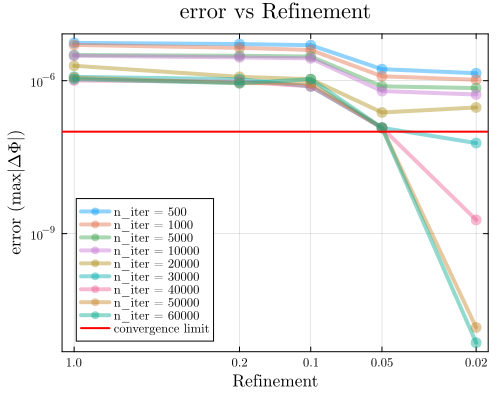

In [9]:
plot(
    xlabel = "Refinement",
    ylabel = "error (max|ΔΦ|)",
    title = "error vs Refinement",
    legend = :bottomleft,
    size = (500, 400),        # immagine più grande
    framestyle = :box,        # bordi chiusi
    xscale = :log10,
    yscale = :log10,
    xticks = xticks = (refinement, [r for r in refinement])
)

for i in 1:length(n_iterations_between_checks)
    plot!(
        refinement,
        c[i],
        label = "n_iter = $(n_iterations_between_checks[i])",
        lw = 4,
        alpha = 0.43,
        marker = :circle,
        markersize = 6,
        markerstrokecolor = :transparent,
        markerstrokewidth = 0,
    )
end

hline!([1e-7],
    color = :red,
    lw = 2,
    label = "convergence limit"
)

xflip!()


---------

## convergence limit $10^{-8}$

In [10]:
c_8 = [[3.37e-6, 3.16e-6, 3.17e-6, 8.49e-7, 7.75e-7],
    [ 1.37e-6, 1.19e-6, 1.07e-6, 2.38e-7, 1.19e-7 ],
    [1.01e-6, 8.9e-7,  8.9e-7, 1.19e-7, 5.9e-8 ]
]

3-element Vector{Vector{Float64}}:
 [3.37e-6, 3.16e-6, 3.17e-6, 8.49e-7, 7.75e-7]
 [1.37e-6, 1.19e-6, 1.07e-6, 2.38e-7, 1.19e-7]
 [1.01e-6, 8.9e-7, 8.9e-7, 1.19e-7, 5.9e-8]

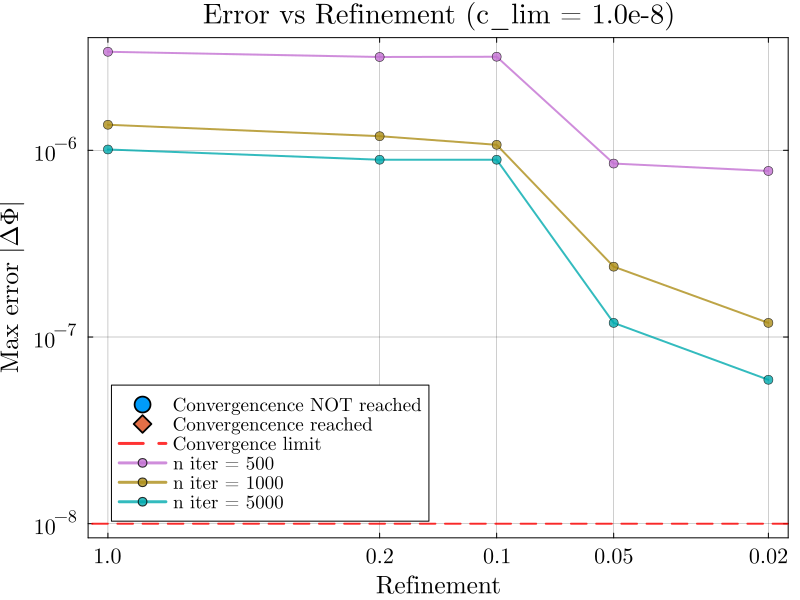

In [11]:

conv_lim = 10^(-8)
p = plot(
    xlabel = "Refinement",
    ylabel = "Max error |ΔΦ|",
    title = "Error vs Refinement (c_lim = $conv_lim)",
    legend = :bottomleft,
    legendfontsize = 12,
    xscale = :log10,
    yscale = :log10,
    xticks = (refinement, refinement),
    xtickfontsize = 14,
    ytickfontsize = 14,
    guidefontsize = 16,      # label assi
    titlefontsize = 18,      # titolo
    grid = :on,
    gridalpha = 0.2,
    size = (800, 600),
    framestyle = :box,
    xflip = true,
    color = palette,
)
# due voci nella legenda dedicate ai marker
scatter!(p, [NaN], [NaN],
    marker = :circle,
    label = "Convergencence NOT reached",
    markersize = 6,
)

scatter!(p, [NaN], [NaN],
    marker = :diamond,
    label = "Convergencence reached",
    markersize = 6,
)
# linea limite
hline!(p, [1e-8],
    color = :red,
    lw = 2,
    alpha = 0.8,
    linestyle = :dash,
    label = "Convergence limit"
)
for i in 1:length(c_8)

    iter = n_iterations_between_checks[i]

    markerstyle = iter in converged_iters ? :diamond : :circle

    plot!(p,
        refinement,
        c_8[i],
        label = "n iter = $(iter)",
        marker = markerstyle,
        markersize = 5,
        markerstrokecolor = :black,
        markerstrokewidth = 0.5,
        alpha = 0.8,
    )
end

p

savefig(p, "error_vs_n_it_10-8.png")
p



------------

# $5 \cdot 10^{-7}$

In [14]:
c_5 = [[7.98e-6, 6.97e-6,  6.24e-6, 2.20e-6, 1.80e-6],  # sigma  500
    [6.09e-6, 5.34e-6, 5.03e-6, 1.52e-6, 1.28e-6],  #sigma   1000
    [3.5911798e-6,3.2484531e-6,  3.144145e-6,  8.046627e-7, 7.4505806e-7 ],  #sigma  5000
    [ 3.1888485e-6, 2.9802322e-6, 2.6524067e-6,  6.556511e-7, 5.9604645e-7], # sigma  10000
    [3.0994415e-6, 2.7418137e-6, 2.08e-6, 4.76e-7, 4.76e-7], # ultime 2 refinement vergono  20000
    [ 2.74e-6, 1.966e-6, 1.788e-6, 2.98e-7, 2.98e-7] , # ultimi due refinement convergono 40000
    [2.34e-6, 1.72e-6, 1.19e-6, 2.98e-7, 2.98e-7], # ultimi due refinement convergono
    [2.05e-6, 1.788e-6, 1.07e-6, 2.38e-7, 2.98e-7]  # ultimi 2 refinement convergono
]

n_iterations_between_checks = [500, 1000, 5000, 10000, 20000, 40000, 50000, 60000];

converged_iters = Set([20000, 40000, 50000, 60000])

Set{Int64} with 4 elements:
  60000
  40000
  20000
  50000

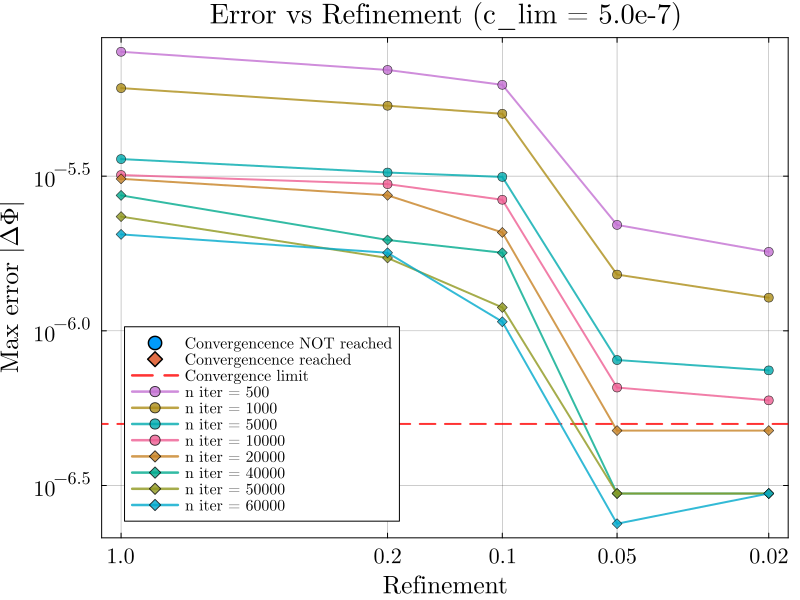

In [15]:

conv_lim = 5e-7
p = plot(
    xlabel = "Refinement",
    ylabel = "Max error |ΔΦ|",
    title = "Error vs Refinement (c_lim = $conv_lim)",
    legend = :bottomleft,
    legendfontsize = 10,
    xscale = :log10,
    yscale = :log10,
    xticks = (refinement, refinement),
    xtickfontsize = 14,
    ytickfontsize = 14,
    guidefontsize = 16,      # label assi
    titlefontsize = 18,      # titolo
    grid = :on,
    gridalpha = 0.2,
    size = (800, 600),
    framestyle = :box,
    xflip = true,
    color = palette,
)
# due voci nella legenda dedicate ai marker
scatter!(p, [NaN], [NaN],
    marker = :circle,
    label = "Convergencence NOT reached",
    markersize = 6,
)

scatter!(p, [NaN], [NaN],
    marker = :diamond,
    label = "Convergencence reached",
    markersize = 6,
)
# linea limite
hline!(p, [5e-7],
    color = :red,
    lw = 2,
    alpha = 0.8,
    linestyle = :dash,
    label = "Convergence limit"
)
for i in 1:length(c_5)

    iter = n_iterations_between_checks[i]

    markerstyle = iter in converged_iters ? :diamond : :circle

    plot!(p,
        refinement,
        c_5[i],
        label = "n iter = $(iter)",
        marker = markerstyle,
        markersize = 5,
        markerstrokecolor = :black,
        markerstrokewidth = 0.5,
        alpha = 0.8,
    )
end

p

savefig(p, "error_vs_n_it_510-7.png")
p



-------------

# 5 $\cdot 10^{-8}$

In [16]:
c_5_8 = [ [5.03e-6, 4.53e-6, 4.35e-6, 1.34e-6, 1.19e-6],  #500  sempre σ
          [3.81e-6, 3.59e-6, 3.36e-6, 9.53e-7, 8.34e-7], # 1000 sempre σ
          [3.14e-6, 3.099e-6, 2.98e-6, 7.74e-7, 6.85e-7], # 5000 sempre σ
          [1.37e-6, 8.94e-7, 9.53e-7, 1.19e-7, 1.19e-7 ],  # 10000 sempre σ
          [1.07e-6, 8.34e-7, 9.53e-7, 1.19e-7, 5.96e-8] , # 20000 sempre σ
          [1.01e-6, 9.54e-7,   8.94e-7, 1.19e-7, 5.96e-8 ] , # 40000 sempre sigma
          [8.94e-7, 8.94e-7, 9.53e-7, 1.19e-7, 5.96e-8],  # 500000 griglia
          [9.53e-7, 9.53e-7, 1.01e-6, 1.19e-7, 5.96e-8]
          
]


8-element Vector{Vector{Float64}}:
 [5.03e-6, 4.53e-6, 4.35e-6, 1.34e-6, 1.19e-6]
 [3.81e-6, 3.59e-6, 3.36e-6, 9.53e-7, 8.34e-7]
 [3.14e-6, 3.099e-6, 2.98e-6, 7.74e-7, 6.85e-7]
 [1.37e-6, 8.94e-7, 9.53e-7, 1.19e-7, 1.19e-7]
 [1.07e-6, 8.34e-7, 9.53e-7, 1.19e-7, 5.96e-8]
 [1.01e-6, 9.54e-7, 8.94e-7, 1.19e-7, 5.96e-8]
 [8.94e-7, 8.94e-7, 9.53e-7, 1.19e-7, 5.96e-8]
 [9.53e-7, 9.53e-7, 1.01e-6, 1.19e-7, 5.96e-8]

In [17]:
n_iterations_between_checks = [500, 1000, 5000, 10000, 20000, 40000, 50000, 60000];

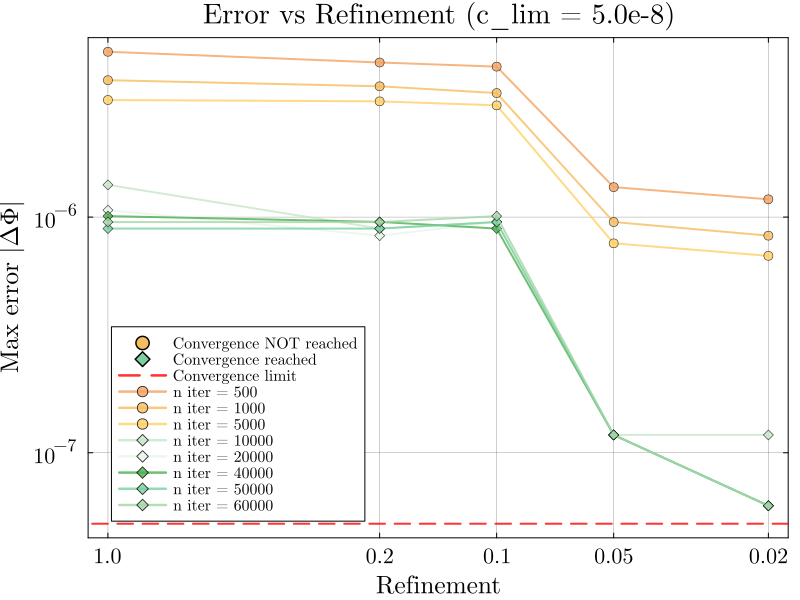

In [37]:
pastel_green = [
    "#4CAF50",
    "#7BCFA2",
    "#A5D6A7",
    "#C8E6C9",
    "#E8F5E9"
]

pastel_orange = [
    "#F4A261",
    "#F6BD60",
    "#FFD166",
    "#FFE5A5",
    "#FFF1C1"
]

conv_lim = 5e-8
conv_lim = 5e-8

p = plot(
    xlabel = "Refinement",
    ylabel = "Max error |ΔΦ|",
    title = "Error vs Refinement (c_lim = $conv_lim)",
    legend = :bottomleft,
    legendfontsize = 10,
    xscale = :log10,
    yscale = :log10,
    xticks = (refinement, refinement),
    xtickfontsize = 14,
    ytickfontsize = 14,
    guidefontsize = 16,
    titlefontsize = 18,
    grid = :on,
    gridalpha = 0.2,
    size = (800, 600),
    framestyle = :box,
    xflip = true
)

# --- legenda marker ---
scatter!(p, [NaN], [NaN],
    marker = :circle,
    color = pastel_orange[2],
    label = "Convergence NOT reached",
    markersize = 6
)

scatter!(p, [NaN], [NaN],
    marker = :diamond,
    color = pastel_green[2],
    label = "Convergence reached",
    markersize = 6
)

# --- linea limite ---
hline!(p, [conv_lim],
    color = :red,
    lw = 2,
    alpha = 0.8,
    linestyle = :dash,
    label = "Convergence limit"
)

# --- curve ---
for i in 1:length(c_5_8)

    iter = n_iterations_between_checks[i]

    # ✅ criterio modificato: tutti gli iter >= 10_000 sono considerati converged
    converged = iter >= 10_000

    markerstyle = converged ? :diamond : :circle
    color = converged ?
        pastel_green[mod1(i, length(pastel_green))] :
        pastel_orange[mod1(i, length(pastel_orange))]

    plot!(
        p,
        refinement,
        c_5_8[i],
        label = "n iter = $(iter)",
        marker = markerstyle,
        markersize = 5,
        color = color,
        markerstrokecolor = :black,
        markerstrokewidth = 0.5,
        alpha = 0.8
    )
end

savefig(p, "error_vs_n_it_5e-8_new.png")
display(p)




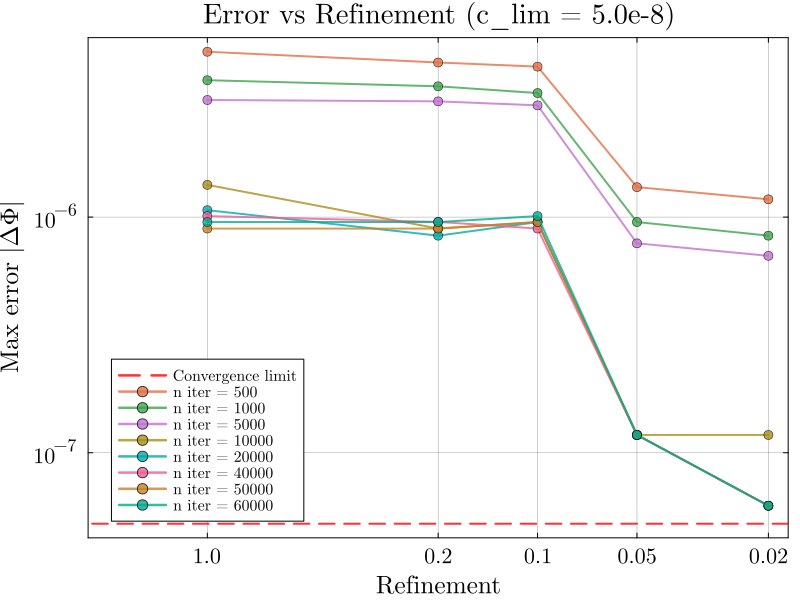

In [18]:

conv_lim = 5e-8
p = plot(
    xlabel = "Refinement",
    ylabel = "Max error |ΔΦ|",
    title = "Error vs Refinement (c_lim = $conv_lim)",
    legend = :bottomleft,
    legendfontsize = 10,
    xscale = :log10,
    yscale = :log10,
    xticks = (refinement, refinement),
    xtickfontsize = 14,
    ytickfontsize = 14,
    guidefontsize = 16,      # label assi
    titlefontsize = 18,      # titolo
    grid = :on,
    gridalpha = 0.2,
    size = (800, 600),
    framestyle = :box,
    xflip = true,
    color = palette,
)


# linea limite
hline!(p, [5e-8],
    color = :red,
    lw = 2,
    alpha = 0.8,
    linestyle = :dash,
    label = "Convergence limit"
)
for i in 1:length(c_5_8)

    iter = n_iterations_between_checks[i]


    plot!(p,
        refinement,
        c_5_8[i],
        label = "n iter = $(iter)",
        marker = :circle,
        markersize = 5,
        markerstrokecolor = :black,
        markerstrokewidth = 0.5,
        alpha = 0.8,
    )
end

p

savefig(p, "error_vs_n_it_510-8.png")
p



In [19]:
times = [[0.39, 0.06, 0.03, 0.05, 0.03],
          [1.01, 0.05, 0.12, 0.06, 0.06],
          [1.54, 0.37, 0.29, 0.29,0.29],
          [12.31, 16.07, 8.30, 0.56, 1.12],
          [17.51, NaN, NaN, 3.12, 3.47],
          [39.15, 66.32, 7.52, 4.11, 4.56],
          [200.22, 61.45, 58.20, 5.00, 6.08 ],
          [105.23, 155.12, 327.43, 5.21, 6.24 ]]

8-element Vector{Vector{Float64}}:
 [0.39, 0.06, 0.03, 0.05, 0.03]
 [1.01, 0.05, 0.12, 0.06, 0.06]
 [1.54, 0.37, 0.29, 0.29, 0.29]
 [12.31, 16.07, 8.3, 0.56, 1.12]
 [17.51, NaN, NaN, 3.12, 3.47]
 [39.15, 66.32, 7.52, 4.11, 4.56]
 [200.22, 61.45, 58.2, 5.0, 6.08]
 [105.23, 155.12, 327.43, 5.21, 6.24]

In [20]:

function human_time(t)
    if isnan(t)
        return ""
    end

    total_seconds = round(Int, t * 60)

    h = total_seconds ÷ 3600
    m = (total_seconds % 3600) ÷ 60
    s = total_seconds % 60

    if h > 0
        return @sprintf("%dh %02dmin %02ds", h, m, s)
    elseif m > 0
        return @sprintf("%dmin %02ds", m, s)
    else
        return @sprintf("%ds", s)
    end
end

human_time (generic function with 1 method)

In [21]:
println(total_times)

UndefVarError: UndefVarError: `total_times` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

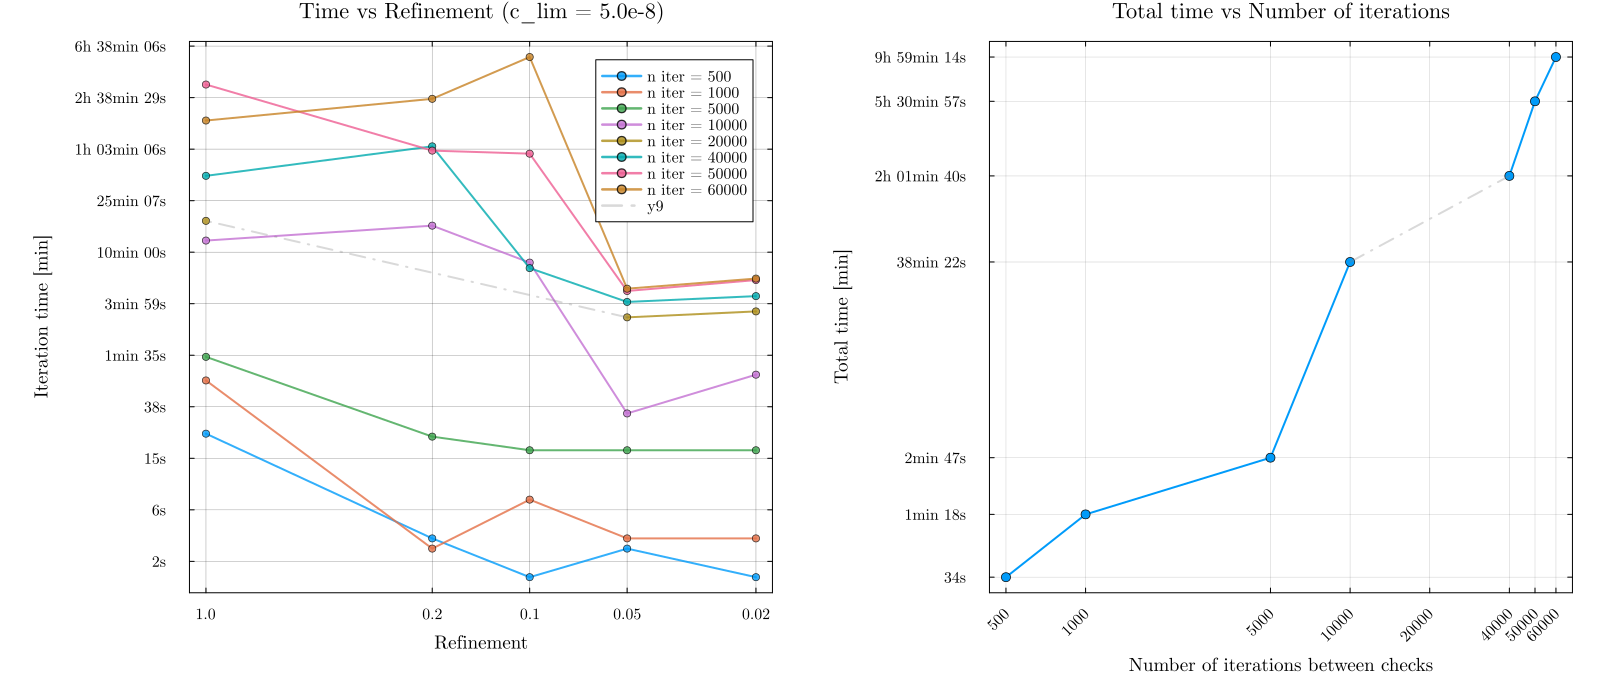

In [22]:
using Plots
using Measures

conv_lim = 5e-8
yticks_vals = [10.0^x for x in -3:0.4:3] 

# --- Primo plot: Time vs Refinement ---
p1 = plot(
    xlabel = "Refinement",
    ylabel = "Iteration time [min]",
    title = "Time vs Refinement (c_lim = $conv_lim)",
    legend = :topright,
    legendfontsize = 10,
    xscale = :log10,
    yscale = :log10,
    yformatter = human_time,
    xticks = (refinement, refinement),
    xtickfontsize = 10,
    ytickfontsize = 10,
    yticks = yticks_vals,
    guidefontsize = 12,
    titlefontsize = 14,
    grid = :on,
    gridalpha = 0.2,
    framestyle = :box,
    xflip = true,
    color = palette,
)

# Aggiungo i dati
for i in 1:length(times)
    iter = n_iterations_between_checks[i]
    plot!(p1,
        refinement,
        times[i],
        label = "n iter = $(iter)",
        marker = :circle,
        markersize = 4,
        markerstrokecolor = :black,
        markerstrokewidth = 0.5,
        alpha = 0.8,
    )
end

plot!(p1, [refinement[1], refinement[4]],
     [times[5][1], times[5][4]],
     seriestype = :line,
     linestyle=:dashdot,
     color = :gray,
     alpha = 0.3)

# --- Secondo plot: Total time vs n_iterations ---
# Sostituisco NaN con il secondo elemento
clean_times = [
    [isnan(t[j]) ? t[2] : t[j] for j in 1:length(t)]
    for t in times
]
total_times = [sum(clean_times[i]) for i in 1:length(clean_times)]



xticks_vals = [10.0^x for x in n_iterations_between_checks] 
yticks_vals = [10.0^x for x in -3:0.4:3]

p2 = plot(
    n_iterations_between_checks,
    total_times,
    xlabel = "Number of iterations between checks",
    ylabel = "Total time [min]",
    title = "Total time vs Number of iterations",
    marker = :circle,
    markersize = 5,
    markerstrokecolor = :black,
    markerstrokewidth = 0.5,
    line = (:solid, 2),
    grid = :on,
    legend = false,
    yformatter = human_time,
    xticks = (n_iterations_between_checks, string.(n_iterations_between_checks)),  
    xrotation = 45,
    yticks = total_times,
    xscale = :log10,
    yscale = :log10,
    guidefontsize = 12,
    titlefontsize = 14,
    xtickfontsize = 10,
    ytickfontsize = 10,
    framestyle = :box,
   
)
plot!(p2, [n_iterations_between_checks[4], n_iterations_between_checks[6]],
     [total_times[4], total_times[6]],
     seriestype = :line,
     linestyle=:dashdot,
     color = :gray,
     alpha = 0.3)
#hline!(p2, [30], color=:red, linestyle=:dash, label="30 min")

# --- Grafico combinato con margini ottimizzati ---
p_combined = plot(
    p1, p2,
    layout = (1,2),
    size = (1600, 700),
    left_margin = 15mm,
    bottom_margin = 15mm,
    right_margin = 5mm,
    top_margin = 5mm,
    tight_layout = true
)


# Salvataggio
savefig(p_combined, "combined_time_plots.png")
p_combined


In [23]:
# rifaccio gli stessi plot ma con un differente range di n_iterations_between_checks

n_iterations_between_checks_2 = [5000, 5500,
                                6000, 6500,
                                7000, 7500,
                                8000, 8500,
                                9000, 9500]
#=                               
                                 8500, 
                                9000, 9500]
                                =#

10-element Vector{Int64}:
 5000
 5500
 6000
 6500
 7000
 7500
 8000
 8500
 9000
 9500

In [24]:
refinement = [ 1.0, 0.2,  0.1, 0.05, 0.02]

5-element Vector{Float64}:
 1.0
 0.2
 0.1
 0.05
 0.02

In [25]:
c_small = [
    [3.144e-6, 3.099e-6, 2.98e-6, 7.75e-7, 6.85e-7], # 5000
    [3.144e-6, 2.92e-6, 2.71e-6, 6.85e-7, 5.96e-7],
    [3.219e-6, 2.32e-6, 1.788e-6, 4.768e-7, 4.17e-7], #6000
    [3.173e-6, 2.563e-6, 2.265e-6, 5.96e-7, 5.384e-7],
    [3.06e-6, 2.533e-6, 1.609e-6, 4.17e-7, 3.57e-7], #7000
    [2.98e-6, 2.59e-6, 2.14e-6, 4.76e-7, 4.768e-7],
    [3.069e-6, 2.32e-6, 1.84e-6, 4.76e-7, 4.17e-7],#8000
    [3.14e-6, 1.847e-6, 1.311e-6, 3.57e-7, 2.98e-7],
    [1.84e-6, 1.72e-6, 1.01e-6, 7.45e-9, 2.38e-7],
    [3.1e-6, 2.44e-6, 2.07e-6, 4.76e-7, 4.17e-7]
]

10-element Vector{Vector{Float64}}:
 [3.144e-6, 3.099e-6, 2.98e-6, 7.75e-7, 6.85e-7]
 [3.144e-6, 2.92e-6, 2.71e-6, 6.85e-7, 5.96e-7]
 [3.219e-6, 2.32e-6, 1.788e-6, 4.768e-7, 4.17e-7]
 [3.173e-6, 2.563e-6, 2.265e-6, 5.96e-7, 5.384e-7]
 [3.06e-6, 2.533e-6, 1.609e-6, 4.17e-7, 3.57e-7]
 [2.98e-6, 2.59e-6, 2.14e-6, 4.76e-7, 4.768e-7]
 [3.069e-6, 2.32e-6, 1.84e-6, 4.76e-7, 4.17e-7]
 [3.14e-6, 1.847e-6, 1.311e-6, 3.57e-7, 2.98e-7]
 [1.84e-6, 1.72e-6, 1.01e-6, 7.45e-9, 2.38e-7]
 [3.1e-6, 2.44e-6, 2.07e-6, 4.76e-7, 4.17e-7]

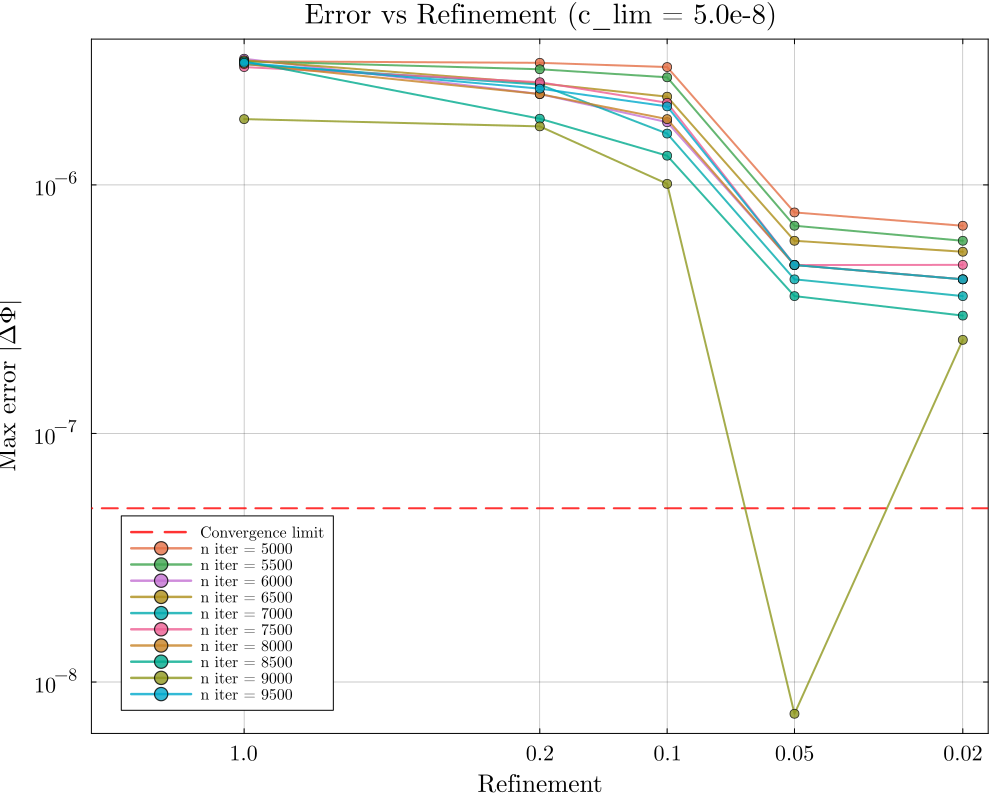

In [26]:

conv_lim = 5e-8
p = plot(
    xlabel = "Refinement",
    ylabel = "Max error |ΔΦ|",
    title = "Error vs Refinement (c_lim = $conv_lim)",
    legend = :bottomleft,
    legendfontsize = 10,
    xscale = :log10,
    yscale = :log10,
    xticks = (refinement, refinement),
    xtickfontsize = 14,
    ytickfontsize = 14,
    guidefontsize = 16,      # label assi
    titlefontsize = 18,      # titolo
    grid = :on,
    gridalpha = 0.2,
    size = (1000, 800),
    framestyle = :box,
    xflip = true,
    color = palette,
)


# linea limite
hline!(p, [5e-8],
    color = :red,
    lw = 2,
    alpha = 0.8,
    linestyle = :dash,
    label = "Convergence limit"
)
for i in 1:length(c_small)

    iter = n_iterations_between_checks_2[i]


    plot!(p,
        refinement,
        c_small[i],
        label = "n iter = $(iter)",
        marker = :circle,
        markersize = 5,
        markerstrokecolor = :black,
        markerstrokewidth = 0.5,
        alpha = 0.8,
    )
end

p

savefig(p, "error_vs_n_it_510-8_small_steps.png")
p



In [27]:
time_small = [
    [2.53, 0.56, 0.47, 0.53, 0.49],
    [3.11, 1.41, 1.12, 0.48, 0.35],
    [2.16, 3.47, 3.20, 0.38, 0.45],
    [2.14, 2.37, 1.19, 0.41, 0.57],
    [4.34, 3.05, 7.49, 1.02, 1.07],
    [4.27, 1.55, 4.26, 1.19, 1.22],
    [4.39, 4.19, 3.36, 1.12, 1.17],
    [3.20, 9.31, 8.28, 1.18, 1.26],
    [13, 2.54, 18.50, 3.24, 1.14],
    [2.37, 3.07, 2.19, 1.01, 1.06]

]

10-element Vector{Vector{Float64}}:
 [2.53, 0.56, 0.47, 0.53, 0.49]
 [3.11, 1.41, 1.12, 0.48, 0.35]
 [2.16, 3.47, 3.2, 0.38, 0.45]
 [2.14, 2.37, 1.19, 0.41, 0.57]
 [4.34, 3.05, 7.49, 1.02, 1.07]
 [4.27, 1.55, 4.26, 1.19, 1.22]
 [4.39, 4.19, 3.36, 1.12, 1.17]
 [3.2, 9.31, 8.28, 1.18, 1.26]
 [13.0, 2.54, 18.5, 3.24, 1.14]
 [2.37, 3.07, 2.19, 1.01, 1.06]

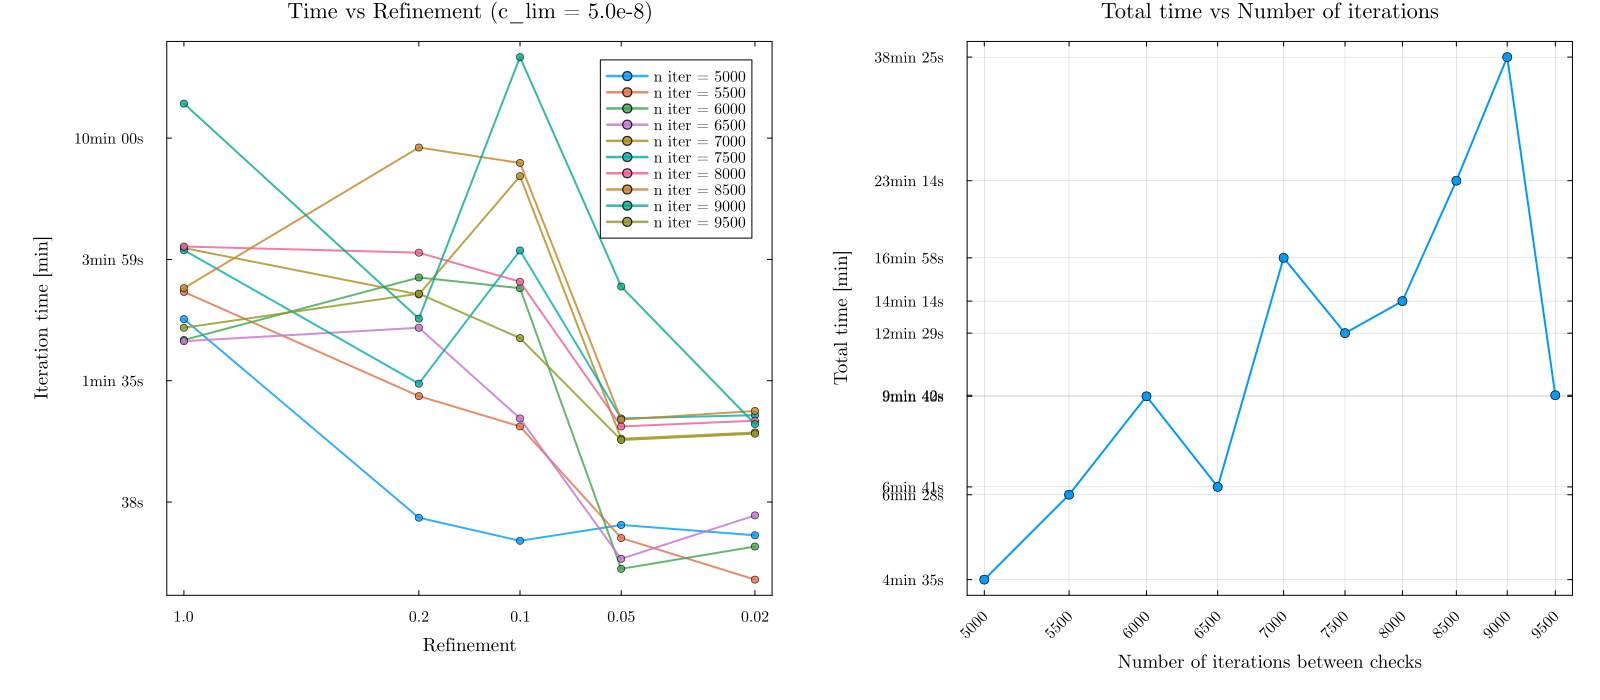

In [28]:
using Plots
using Measures

conv_lim = 5e-8
yticks_vals = [10.0^x for x in -3:0.4:3] 

# --- Primo plot: Time vs Refinement ---
p1 = plot(
    xlabel = "Refinement",
    ylabel = "Iteration time [min]",
    title = "Time vs Refinement (c_lim = $conv_lim)",
    legend = :topright,
    legendfontsize = 10,
    xscale = :log10,
    yscale = :log10,
    yformatter = human_time,
    xticks = (refinement, refinement),
    xtickfontsize = 10,
    ytickfontsize = 10,
    yticks = yticks_vals,
    guidefontsize = 12,
    titlefontsize = 14,
    grid = :off,
    gridalpha = 0.2,
    framestyle = :box,
    xflip = true,
    color = palette,
)

# Aggiungo i dati
for i in 1:length(time_small)
    iter = n_iterations_between_checks_2[i]
    plot!(p1,
        refinement,
        time_small[i],
        label = "n iter = $(iter)",
        marker = :circle,
        markersize = 4,
        markerstrokecolor = :black,
        markerstrokewidth = 0.5,
        alpha = 0.8,
    )
end


# --- Secondo plot: Total time vs n_iterations ---
# Sostituisco NaN con il secondo elemento
clean_times = [
    [isnan(t[j]) ? t[2] : t[j] for j in 1:length(t)]
    for t in time_small
]
total_times = [sum(clean_times[i]) for i in 1:length(clean_times)]



xticks_vals = [10.0^x for x in n_iterations_between_checks_2] 
yticks_vals = [10.0^x for x in -3:0.4:3]

p2 = plot(
    n_iterations_between_checks_2,
    total_times,
    xlabel = "Number of iterations between checks",
    ylabel = "Total time [min]",
    title = "Total time vs Number of iterations",
    marker = :circle,
    markersize = 5,
    markerstrokecolor = :black,
    markerstrokewidth = 0.5,
    line = (:solid, 2),
    grid = :on,
    legend = false,
    yformatter = human_time,
    xticks = (n_iterations_between_checks_2, string.(n_iterations_between_checks_2)),  
    xrotation = 45,
    yticks = total_times,
    xscale = :log10,
    yscale = :log10,
    guidefontsize = 12,
    titlefontsize = 14,
    xtickfontsize = 10,
    ytickfontsize = 10,
    framestyle = :box,
   
)


# --- Grafico combinato con margini ottimizzati ---
p_combined = plot(
    p1, p2,
    layout = (1,2),
    size = (1600, 700),
    left_margin = 15mm,
    bottom_margin = 15mm,
    right_margin = 5mm,
    top_margin = 5mm,
    tight_layout = true
)


# Salvataggio
savefig(p_combined, "combined_time_plots_smaller_steps.png")
p_combined
